<a href="https://colab.research.google.com/github/Asser146/ML-Assignments/blob/master/Assignment3_Bagging_Boosting/ML_Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
data = pd.read_csv('your_data.csv')
data.head

<bound method NDFrame.head of         Unnamed: 0  systolic  fasting blood sugar  AST  dental caries  Gtp  \
0                0       135                   94   22              0   27   
1                1       146                  147   27              1   37   
2                2       118                   79   27              0   53   
3                3       131                   91   20              1   30   
4                4       121                   91   19              0   17   
...            ...       ...                  ...  ...            ...  ...   
159251      159251       127                   64   25              0   13   
159252      159252       120                   89   21              0   18   
159253      159253       114                   84   15              0   12   
159254      159254       121                  122   22              0   37   
159255      159255       125                   83   21              0   17   

        hemoglobin  serum creatin

count    159256.000000
mean        122.503648
std          12.729315
min          77.000000
25%         114.000000
50%         121.000000
75%         130.000000
max         213.000000
Name: systolic, dtype: float64


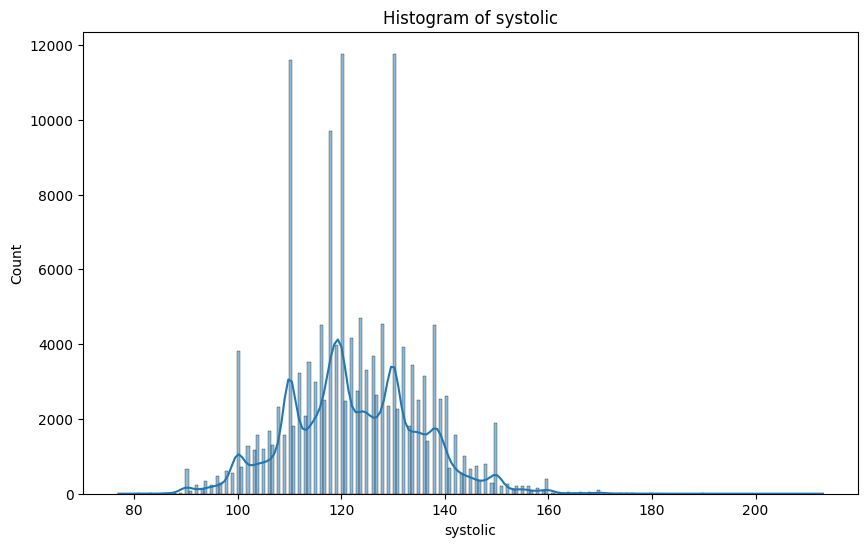

count    159256.000000
mean         98.352552
std          15.329740
min          46.000000
25%          90.000000
50%          96.000000
75%         103.000000
max         375.000000
Name: fasting blood sugar, dtype: float64


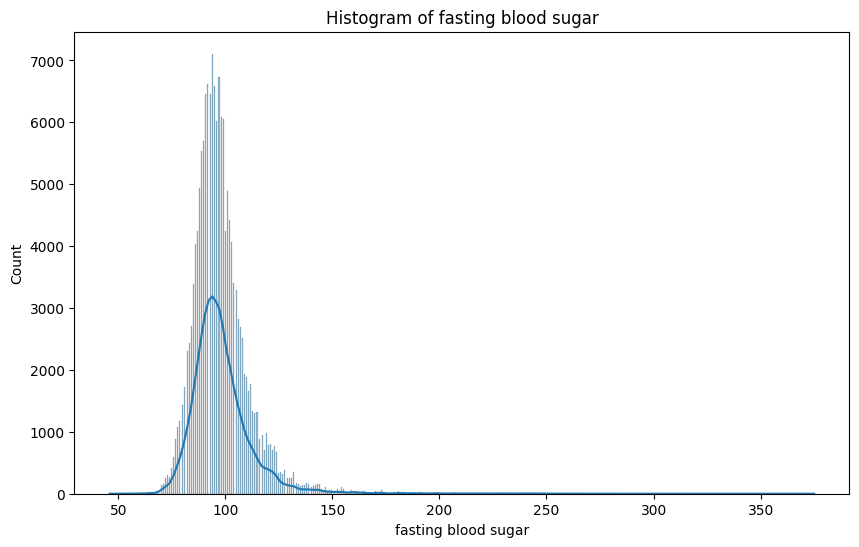

count    159256.000000
mean         25.516853
std           9.464882
min           6.000000
25%          20.000000
50%          24.000000
75%          29.000000
max         778.000000
Name: AST, dtype: float64


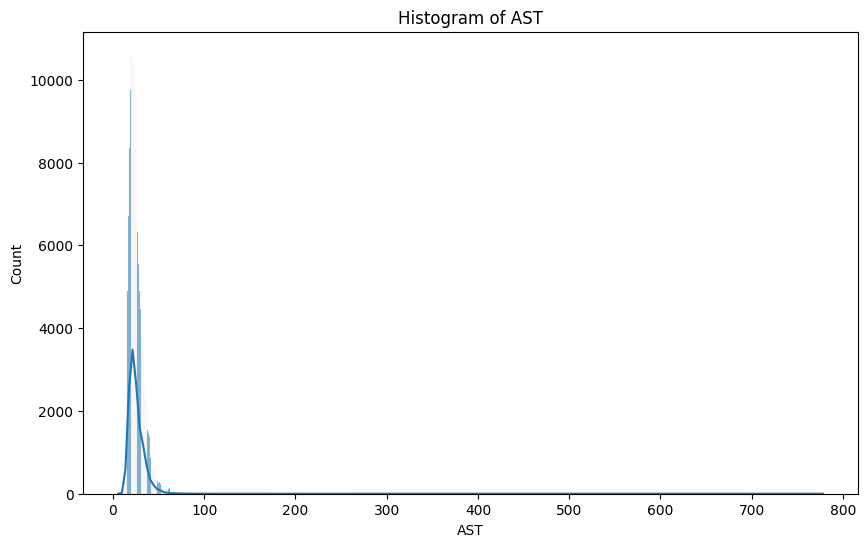

count    159256.000000
mean         36.216004
std          31.204643
min           2.000000
25%          18.000000
50%          27.000000
75%          44.000000
max         999.000000
Name: Gtp, dtype: float64


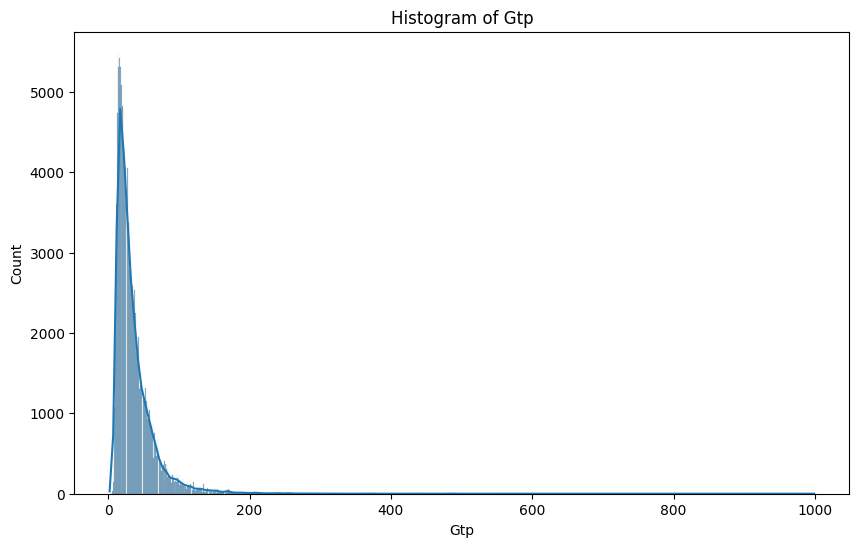

count    159256.000000
mean         14.796965
std           1.431213
min           4.900000
25%          13.800000
50%          15.000000
75%          15.800000
max          21.000000
Name: hemoglobin, dtype: float64


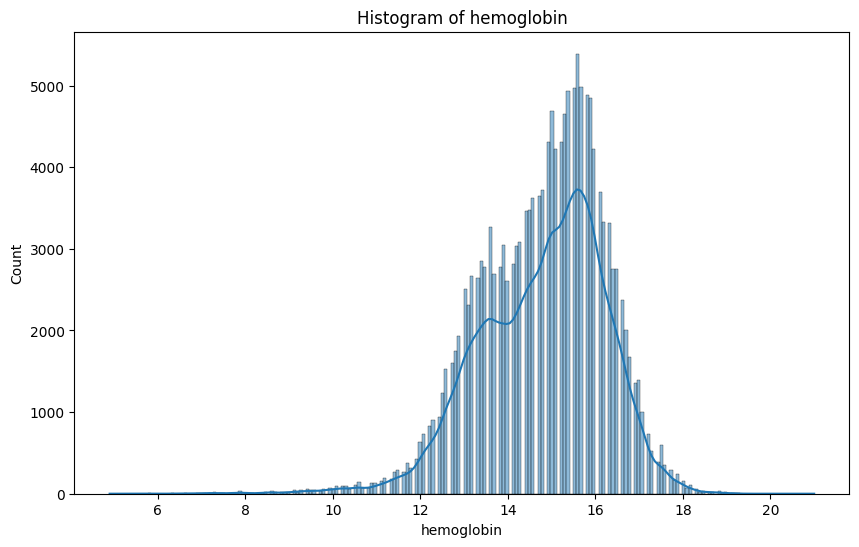

count    159256.000000
mean          0.892764
std           0.179346
min           0.100000
25%           0.800000
50%           0.900000
75%           1.000000
max           9.900000
Name: serum creatinine, dtype: float64


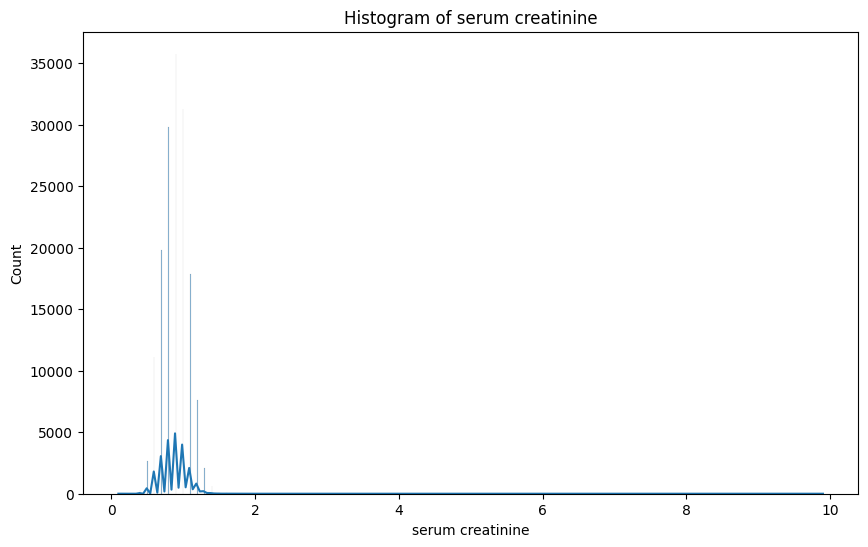

count    159256.000000
mean         44.306626
std          11.842286
min          20.000000
25%          40.000000
50%          40.000000
75%          55.000000
max          85.000000
Name: age, dtype: float64


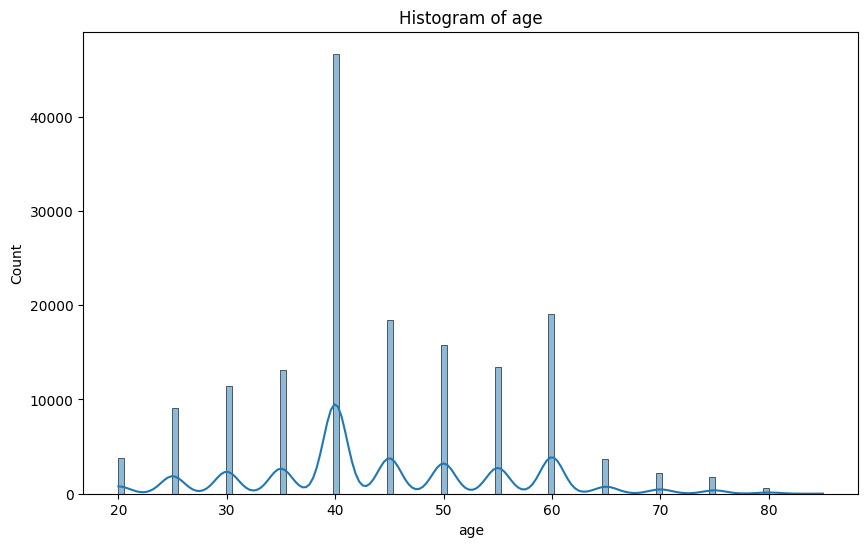

count    159256.000000
mean        165.266929
std           8.818970
min         135.000000
25%         160.000000
50%         165.000000
75%         170.000000
max         190.000000
Name: height(cm), dtype: float64


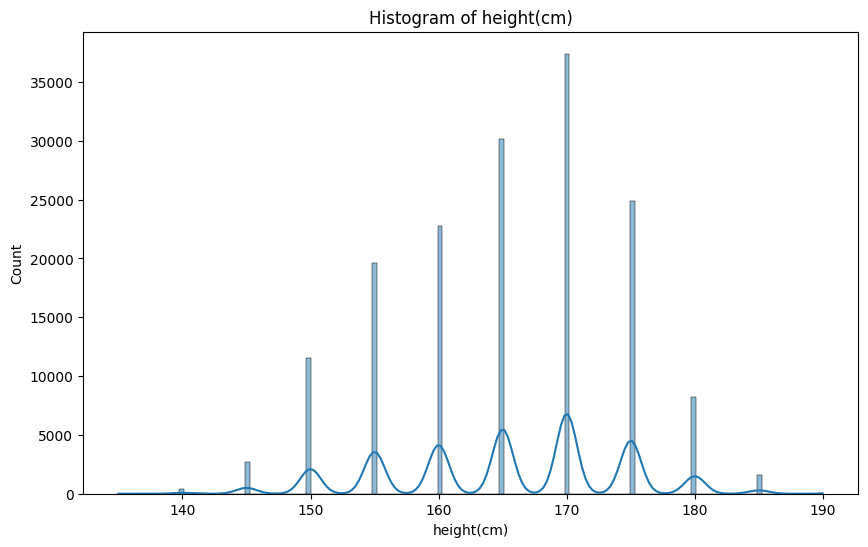

count    159256.000000
mean        127.616046
std          66.188989
min           8.000000
25%          77.000000
50%         115.000000
75%         165.000000
max         766.000000
Name: triglyceride, dtype: float64


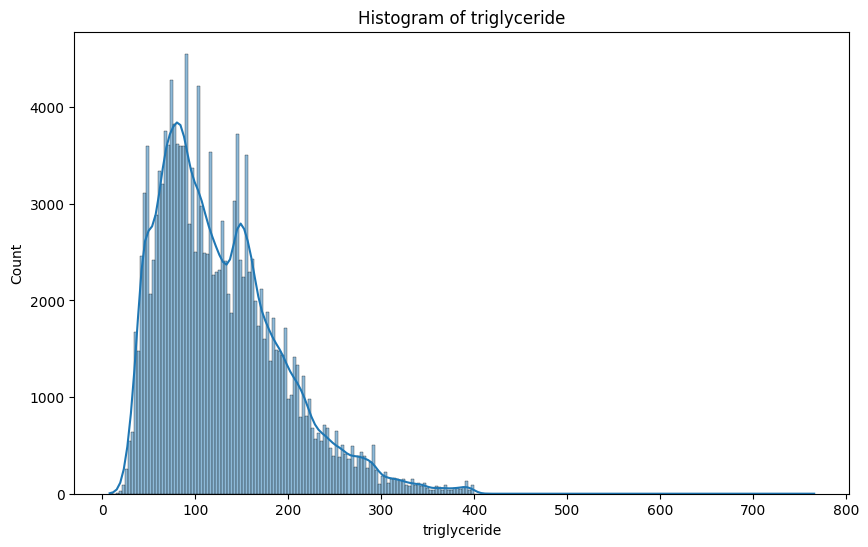

0    127724
1     31532
Name: dental caries, dtype: int64


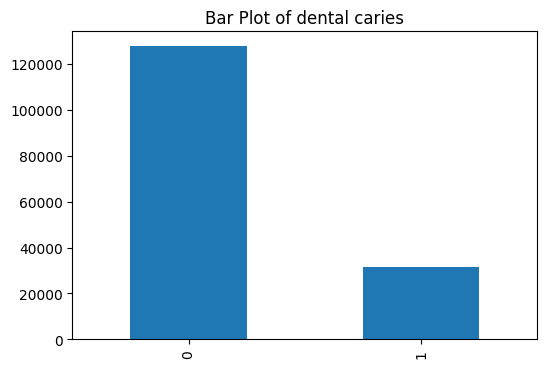

In [13]:
# For continues variables
cont_var=['systolic','fasting blood sugar','AST','Gtp','hemoglobin','serum creatinine','age','height(cm)','triglyceride']

for var in cont_var:

  print(data[var].describe())

  # Histogram
  plt.figure(figsize=(10, 6))
  sns.histplot(data[var], kde=True)
  plt.title('Histogram of {}'.format(var))
  plt.show()

# For categorical variable
cat_var = 'dental caries'
print(data[cat_var].value_counts())

# Bar chart
plt.figure(figsize=(6, 4))
data[cat_var].value_counts().plot(kind='bar', stacked=True)
plt.title('Bar Plot of {}'.format(cat_var))
plt.show()

